<h1 align:center style="color:#00008B; font-size:46px">The basics of Data science with python</h1>

> *DS Data manipulation, analysis and visualisation in Python*  
> *October, 2021*<br>
> *Part-2*
>


<h2 style="color:red">1- Manipulating Data with pandas, numpy, matplotlib: </h2>

In [4]:
import pandas as pd
brics = pd.read_csv("brics.csv")
brics.index = ["BR","RU","IN","CH","SA"]
brics

,country,capital,area,population
BR,Brazil,Brazilia,8.516,200.40
RU,Russia,Moscow,17.100,143.50
IN,india,new delhi,3.286,1252.00
CH,china,Beijing,9.597,1357.00
SA,south_africa,pretoria,1.221,52.98


In [5]:
# ----------- Comparison operations with numpy -----------
import numpy as np
bmi = np.array([21.256, 20.215, 24.142, 21.120, 20.222, 22.014, 23.325])
bmi

array([21.256, 20.215, 24.142, 21.12 , 20.222, 22.014, 23.325])

In [6]:
bmi > 21

array([ True, False,  True,  True, False,  True,  True])

In [7]:
bmi <22

array([ True,  True, False,  True,  True, False, False])

In [8]:
# bmi> 21 and bmi <22 This operation does not work! To remedy this, there are functions more suited to this
# ==> logical_and(), logical_or(), logical_not()

# Exmples:
np.logical_and(bmi<22, bmi>21)

array([ True, False, False,  True, False, False, False])

In [9]:
# To select only the elements satisfying the conditions, we can use this function: 
bmi[np.logical_and(bmi<22, bmi>21)]

array([21.256, 21.12 ])

In [10]:
# ----------- LOOP Data structure -----------
brics

,country,capital,area,population
BR,Brazil,Brazilia,8.516,200.40
RU,Russia,Moscow,17.100,143.50
IN,india,new delhi,3.286,1252.00
CH,china,Beijing,9.597,1357.00
SA,south_africa,pretoria,1.221,52.98


In [11]:
for lab,row in brics.iterrows():
    print(lab)
    print(row)

# The iterrows methode looks at the data frame, and on each iteration generates two peaces of data: the label of the row and
# then the actual data in the row as a pandas series

BR
country         Brazil
capital       Brazilia
area             8.516
population       200.4
Name: BR, dtype: object
RU
country       Russia
capital       Moscow
area            17.1
population     143.5
Name: RU, dtype: object
IN
country           india
capital       new delhi
area              3.286
population         1252
Name: IN, dtype: object
CH
country         china
capital       Beijing
area            9.597
population       1357
Name: CH, dtype: object
SA
country       south_africa
capital           pretoria
area                 1.221
population           52.98
Name: SA, dtype: object


In [12]:
# If you want to select only the capital on each iteration, you can try this

brics = pd.read_csv("brics.csv", index_col=0)
brics.index = ["BR", "RU", "IN", "CH", "SA"] 
for lab, row in brics.iterrows():
    print(lab + ": " + row["capital"])

BR: Brazilia
RU: Moscow
IN: new delhi
CH: Beijing
SA: pretoria


<b>How to add a column?</b> <br>
    It's easy, you can try this code for example

In [13]:
brics = pd.read_csv("brics.csv")
brics.index = ["BR", "RU", "IN", "CH", "SA"] 
for lab, row in brics.iterrows():
    brics.loc[lab, "name_length"]  = len(row["country"])
print(brics)

         country    capital    area  population  name_length
BR        Brazil   Brazilia   8.516      200.40          6.0
RU        Russia     Moscow  17.100      143.50          6.0
IN         india  new delhi   3.286     1252.00          5.0
CH         china    Beijing   9.597     1357.00          5.0
SA  south_africa   pretoria   1.221       52.98         12.0


Note that this code works correctly but has a small flaw. What? Yes, because we're creating a Series object on every iteration. It dosn't matter her but if we work with big dataframe, this loss in efficiency can because problematic.

The best way to do this is to use the apply function like this:

In [14]:
brics["name_length"] = brics["country"].apply(len)
print(brics)

         country    capital    area  population  name_length
BR        Brazil   Brazilia   8.516      200.40            6
RU        Russia     Moscow  17.100      143.50            6
IN         india  new delhi   3.286     1252.00            5
CH         china    Beijing   9.597     1357.00            5
SA  south_africa   pretoria   1.221       52.98           12


Let's try with another example, add a column and capitalize the country

In [16]:
brics["COUNTRY"] = brics["country"].apply(str.upper)
brics

,country,capital,area,population,name_length,COUNTRY
BR,Brazil,Brazilia,8.516,200.40,6,BRAZIL
RU,Russia,Moscow,17.100,143.50,6,RUSSIA
IN,india,new delhi,3.286,1252.00,5,INDIA
CH,china,Beijing,9.597,1357.00,5,CHINA
SA,south_africa,pretoria,1.221,52.98,12,SOUTH_AFRICA


<h2 style="color:red">2- Random numbers </h2>

In [17]:
import numpy as np
np.random.rand()

0.4476992126314475

<b>What is seed() function:</b>
<br>The seed() method is used to initialize the random number generator. he random number generator needs a number to start with (a seed value), to be able to generate a random number.
By default the random number generator uses the <b style="color:blue">current system time.</b>
<br><br><b>Note: </b> If you use the same seed value twice you will get the same random number twice. See example below

In [21]:
np.random.seed(123)
var1 = np.random.rand()

np.random.seed(10)
var2 = np.random.rand()

np.random.seed(123)
var3 = np.random.rand()

np.random.seed(10)
var = np.random.rand()

print(var1, var2, var3, var4)
print(var1==var3)
print(var2==var4)
print(var1==var2)
print(var3==var4)

0.6964691855978616 0.771320643266746 0.6964691855978616 0.771320643266746
True
True
False
False


<b style="font-size:20px">Go further!!!</b>
<br>Let's practice it in the game; the Empire State Building game. We will do this in several stages. The goal is to determine at the end the percentage chance of reaching at least level 60 
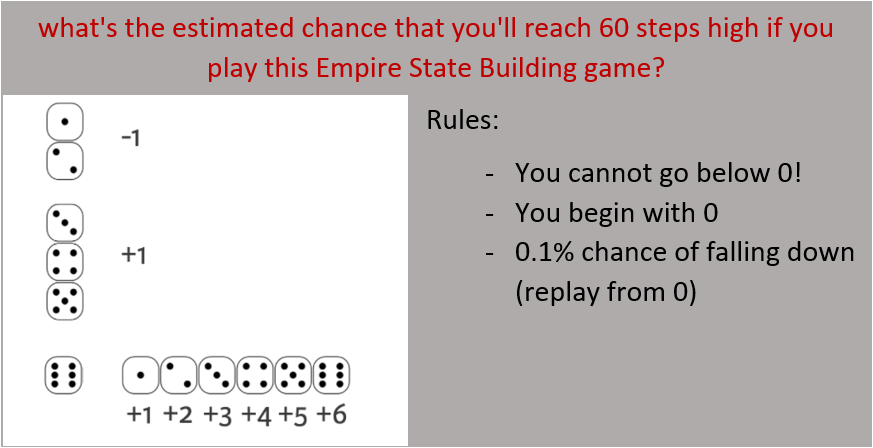

* <b>Step 1 (Easy): Start with the single dice

In [23]:
import numpy as np
np.random.seed(123)
outcomes = []

for x in range(10):
    coin = np.random.randint(0,2)
    if coin == 0:
        outcomes.append("pile")
    else:
        outcomes.append("face")
        
print(outcomes)

['pile', 'face', 'pile', 'pile', 'pile', 'pile', 'pile', 'face', 'face', 'pile']


* <b>Step 2 (Easy): Random walk of the dice

In [20]:
#Si on veut transformer ceci en une marche d'étape aléatoires, on peut faire ceci:
import numpy as np
np.random.seed(123)
tails = [0]

for x in range(10):
    coin = np.random.randint(0,2)
    tails.append(tails[x] + coin)
        
print(tails)

[0, 0, 1, 1, 1, 1, 1, 1, 2, 3, 3]


* <b>Step 3 (Easy): We calculate the odds once we know the distribution

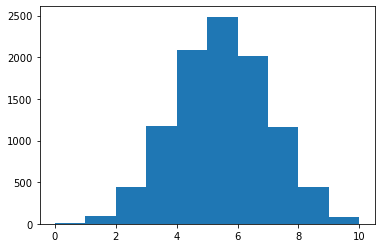

In [25]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)
final_tails = []
for x in range(10000):
    tails = [0]
    for x in range(10):
        coin = np.random.randint(0,2)
        tails.append(tails[x] + coin)
    final_tails.append(tails[-1])
    
plt.hist(final_tails, bins=10)
plt.show()

* <b>Step 4 (Easy): Simulation of the distribution of throws of the game "Empire State Building" 

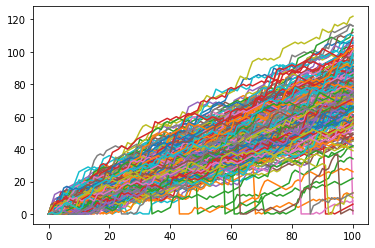

In [26]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

# Simulate random walk 250 times
all_walks = []
for i in range(250) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        # Implement clumsiness
        if np.random.rand() <= 0.001 :
            step = 0

        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))
plt.plot(np_aw_t)
plt.show()

* <b>Step 5 (medium): Visualize the chance to reach 60 steps 

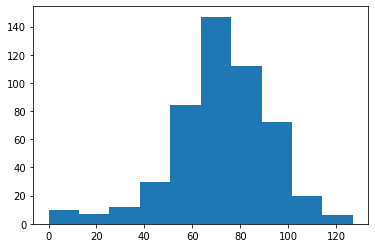

You have 78.4 % to have the chance to reach level 60! 


In [28]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)
iteration_number = 500  # Simulate random walk 500 times

all_walks = []
for i in range(iteration_number) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))

# Select last row from np_aw_t: ends
ends = np_aw_t[-1,:]

count = [i for i in ends if i >=60] #Chance d'arriver à l'étage 60 ou plus

# Plot histogram of ends, display plot
plt.hist(ends)
plt.show()

print("You have " + str((len(count)/iteration_number)*100) + " % to have the chance to reach level 60! ")